Importing Neccessary Data Science Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import velocity_testing_functions as vtf


Creating a DTS_recording Class so results can be manipulated and plotted quickly

In [40]:
class DTS_recording:
    def __init__(self,frame_by_frame_distance_array,frames_per_second):
        self.frame_by_frame_distance_array = [abs(i - frame_by_frame_distance_array[0]) for i in frame_by_frame_distance_array]        
        self.frames_per_second = frames_per_second
        self.constant_time_array = [i/self.frames_per_second for i in range(len(self.frame_by_frame_distance_array))]
        self.change_in_frame_by_frame_distance_array = np.diff(self.frame_by_frame_distance_array)
        self.velocities = self.change_in_frame_by_frame_distance_array * self.frames_per_second / 1000
        self.median_velocity = np.median(self.velocities)
    
    
    def rolling_average(self,number_of_points):
        data_array = np.array(self.change_in_frame_by_frame_distance_array)
        moving_avg = np.convolve(data_array, np.ones(number_of_points)/number_of_points, mode='valid')
        return moving_avg
        
    def Distance_Time_Velocity_Time_stacked_plot(self):
        plt.figure(figsize=(18,10))
        sns.set_style('darkgrid')

        plt.subplot(2,1,1)
        plt.scatter(self.frame_by_frame_distance_array,self.constant_time_array)
        plt.title("Relationship between Distance Traveled (mm) and Time elapsed (s) for the DTS system at {velocity} m/s".format(velocity = self.median_velocity ))
        plt.ylabel("Time (s)")
        plt.xlabel("Distance traveled (mm)")

        plt.subplot(2,1,2)   
        plt.scatter(self.frame_by_frame_distance_array[:-1],self.velocities)     
        plt.title("Relationship between Distance Traveled (mm) and the corresponding velocity in m/s for the DTS system at {velocity} m/s".format(velocity = self.median_velocity))
        plt.xlabel("Distance traveled (mm)")
        plt.ylabel("Velocity at distance (m/s)")

    def Histogram(self):
        plt.figure(figsize=(18,5))
        sns.histplot(self.velocities,kde=True)
        plt.xlabel("Velocity (m/s) at specifc distance")
        plt.title("Histogram detailing distribrution of Velocities during Testing")

    def rolling_average_velocity_distance_plot(self,number_of_points):
        plt.figure(figsize = (18,5))
        plt.scatter(range(len(self.rolling_average(number_of_points))),self.rolling_average(number_of_points))
        plt.title("Relationship between Distance Traveled (mm) and the corresponding velocity in m/s for the DTS system at {velocity} m/s".format(velocity = self.median_velocity))
        plt.xlabel("Distance traveled (mm)")
        plt.ylabel("Velocity at distance (m/s)")

Import Results and Create an Object for each Test

In [41]:
from DTS_frame_by_frame_displacement_results import C0494_frame_by_frame_distance_array

C0494 = DTS_recording(C0494_frame_by_frame_distance_array,1000)

Creating Visulisations of the Results

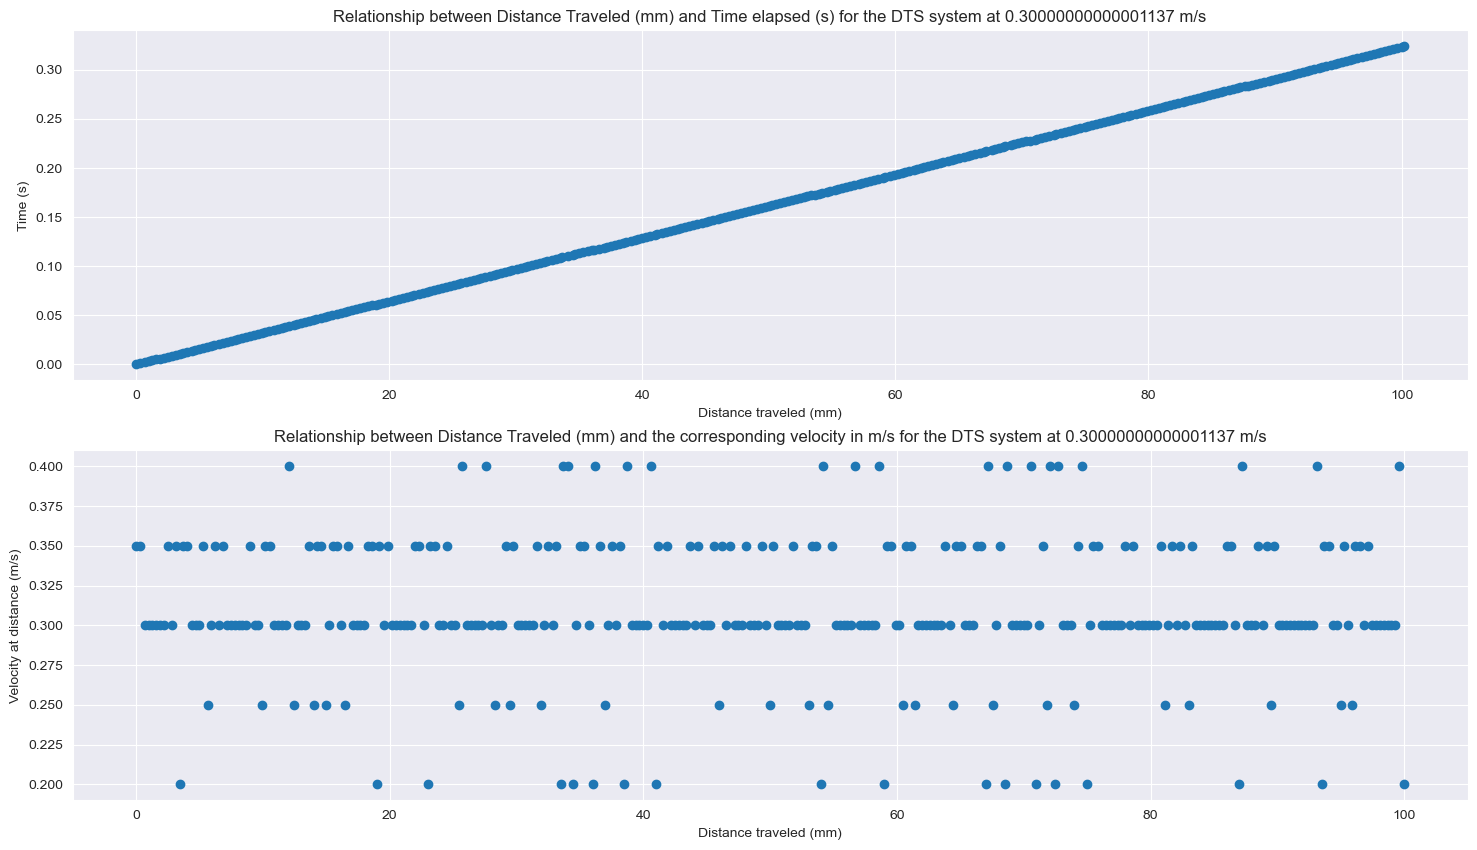

In [43]:
C0494.Distance_Time_Velocity_Time_stacked_plot()

Other Visulisations

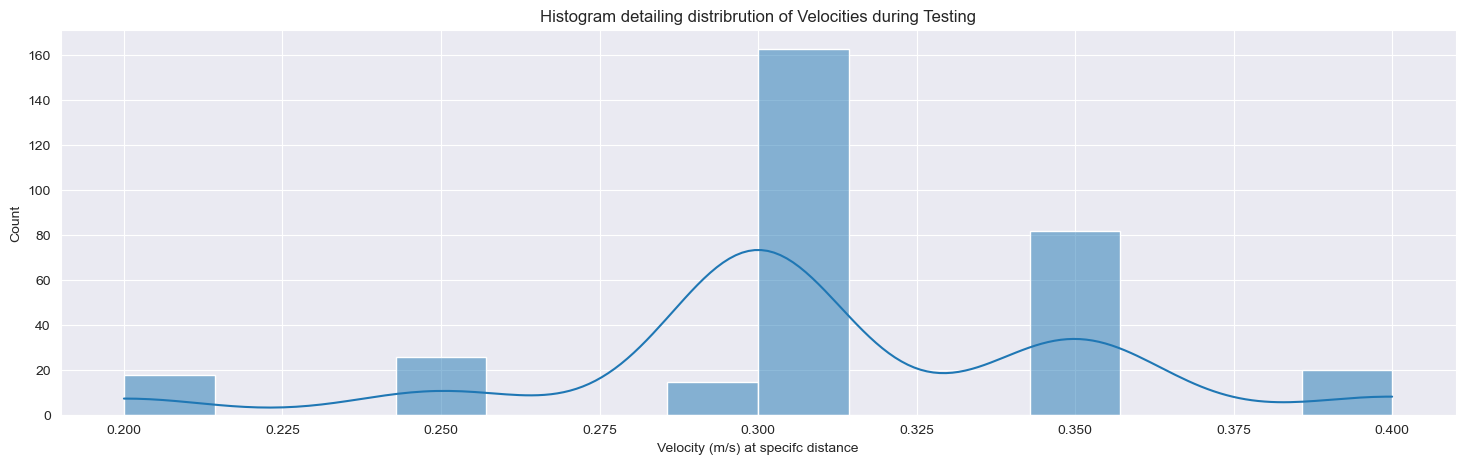

In [45]:
C0494.Histogram()

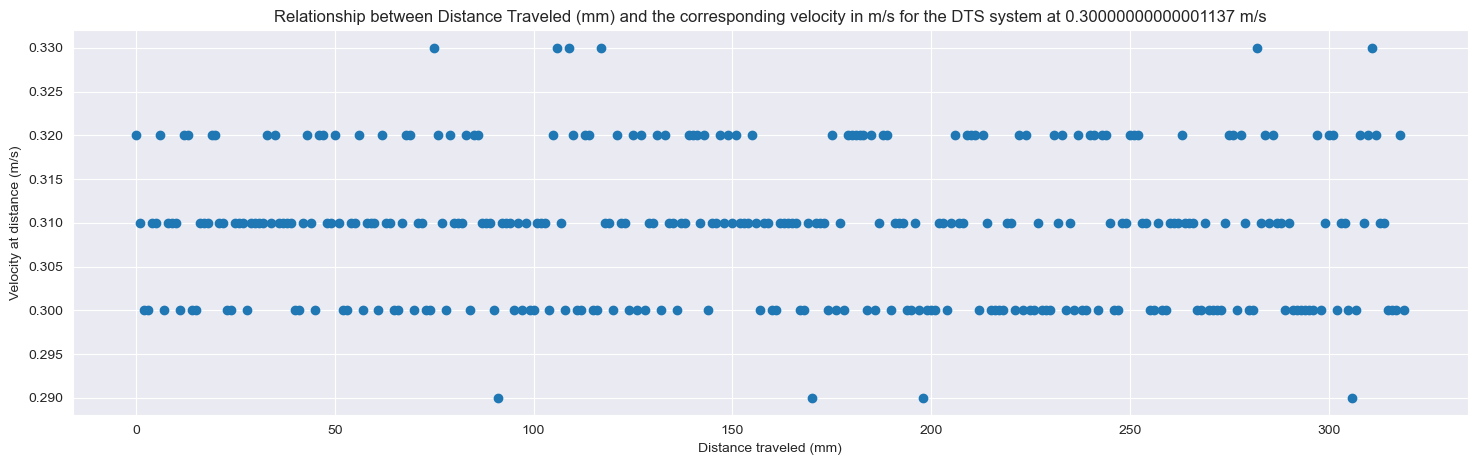

In [47]:
C0494.rolling_average_velocity_distance_plot(5)

velocity graph of all cycles overlayed

Text(0, 0.5, 'distance (mm)')

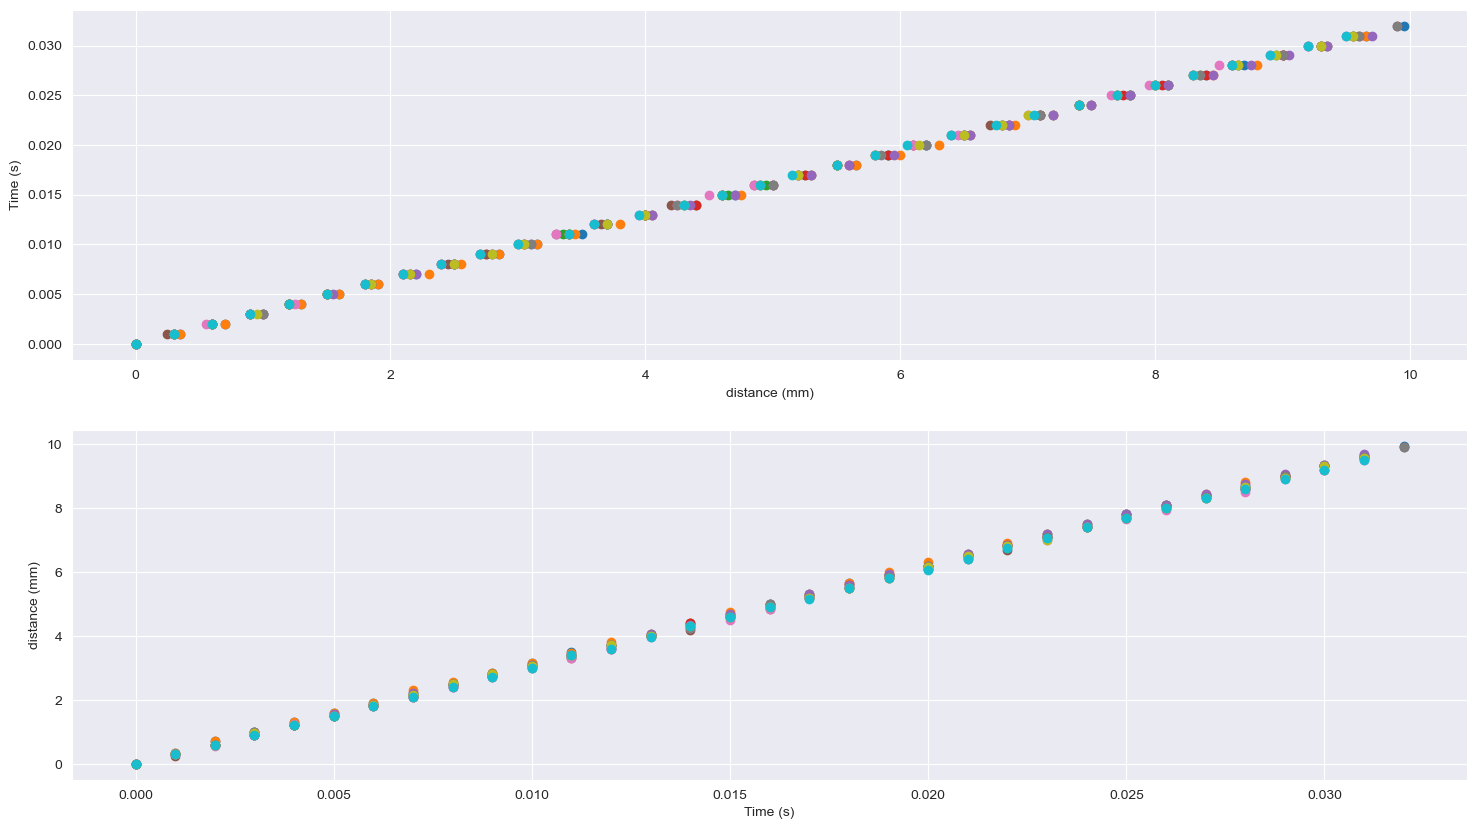

In [52]:
cycles = vtf.plot_10_cycles(C0494_frame_by_frame_distance_array)
zeroed_cycles = [vtf.zero_cycle(cycle) for cycle in cycles]

plt.figure(figsize = (18,10))
for i in range(10):
    plt.subplot(2,1,1)
    plt.scatter(zeroed_cycles[i],[i/1000 for i in range(len(zeroed_cycles[i]))])
    plt.ylabel("Time (s)")
    plt.xlabel("distance (mm)")
    plt.subplot(2,1,2)
    plt.scatter([i/1000 for i in range(len(zeroed_cycles[i]))],zeroed_cycles[i])
    
plt.xlabel("Time (s)")
plt.ylabel("distance (mm)")
